# 1. Load Trained Word2Vec Model

In [1]:
from gensim.models import Word2Vec

wordModel = Word2Vec.load('word_train.model')

wordModel.wv.most_similar('gzip')

[('"vVhtb9s4Ev4eIP/B0XUNEZZlO+19ONPcYNMXbHHd7gFb3H5w3IKiaFmJLLkSnWzO8X+/GZJ680vW7eG2QGO+zTPDhxzOjO553lmwi6F3yy5G9PysyHKleJBItpHj+ToVKs5Sl2x4Hq2XMlWFL3iSSOnHT0/u/iBbeHfdrkgkz9+nSub3PHHviBdmQi/0RS65km8Tib1utxqPpLKDxfXjJx595EvZ7bqVNT5ng8/uTXgTXpHpzeDG7892erpLrvTfFwMvcZ/Fdh0N6xCv2iMnm/7ognFfJLwocJFfwDbEwh3cBGgICtwEA9Lt1mbdgdiWELL17sZNpCEDoCOKF5KHDvETmUZqAZuEAXaYoGqxB78+X61kGr5exEnocj/PHorpcEY87sdpIXN1LedZLhENhuZxXii9lBCarpME7VE/AxgotK0/sxDR4UbEc3dUSWu11nSyQR6CTKlsicNsOqNggnsPVypgQxpMeHM5DXo9YhjWtgezo0wbTMO121YybXct9qwGJRQMbi8im4qBd1mmkPJ5dpzyOaxxkNcm4TAKTOL2zNYOmqG3CCtbkjv2o4WhTKSSnfbMFlmHRotqOANfyCQpGqrtuqZO2PKFHW7zuuSqplVf2S9phm0kl2zcJUyzUyXdKe//Z9j/x6xHtHi3e37mZvcyz+NQMoSajmB3DbiVHu12ndI3HMbU40pm804FO3Ww+cXplUizq2fmxrXv3brcC1rqMhY0uwKpvM7CWCKPFO+laGzWk6wG+8oajx3QiRdVLeLi6B01lGBLhpqNGiuXYG2Brojy6LxNnF3YXK4SLsDtdlEdb2/oi4V2LGgul8CMuWcH3rvrx/fhLu78IYxT8G7iYQ/woHfUF4oVT53mSj8O2Q6gmXA8EzvKZWkq858//fKBOd00KFa0+7c/Lv9+/Yo6xvBdBzFihMqkkJ1vpb9k5f9zDBXn+8fxPxyDZc0egzmUU47BrDxwDPZcW4sOH8LbY4dgxMwh

# 2. Extract Static Features
- Count Sensitive Functions
- Embedding Words

### 2.1 Count Sensitive Functions

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

sensitiveFunctions = ['system','phpinfo','pcntl_exec','python_eval','base64_decode','gzip','mkdir','fopen','fclose','readfile','passthru', '$_GET', '$_POST']

vector_cluster = []
label_cluster = []

for function in sensitiveFunctions:
    vectors = []
    words = []
    try:
      for word, _ in wordModel.wv.most_similar(function, topn=10):
          vectors.append(wordModel.wv.get_mean_vector(word))
          words.append(word)
    except:
      pass
    vector_cluster.append(vectors)
    label_cluster.append(words)


vector_cluster = np.array(vector_cluster)
# n, m, k = vector_cluster.shape
tsne_model_en_2d = TSNE(perplexity=3, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = tsne_model_en_2d.fit_transform(vector_cluster)

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Cleaned Webshell Dataset', sensitiveFunctions, embeddings_en_2d, label_cluster, 0.7,
                        'similar_words.png')



# 3. Extract Dynamic Features

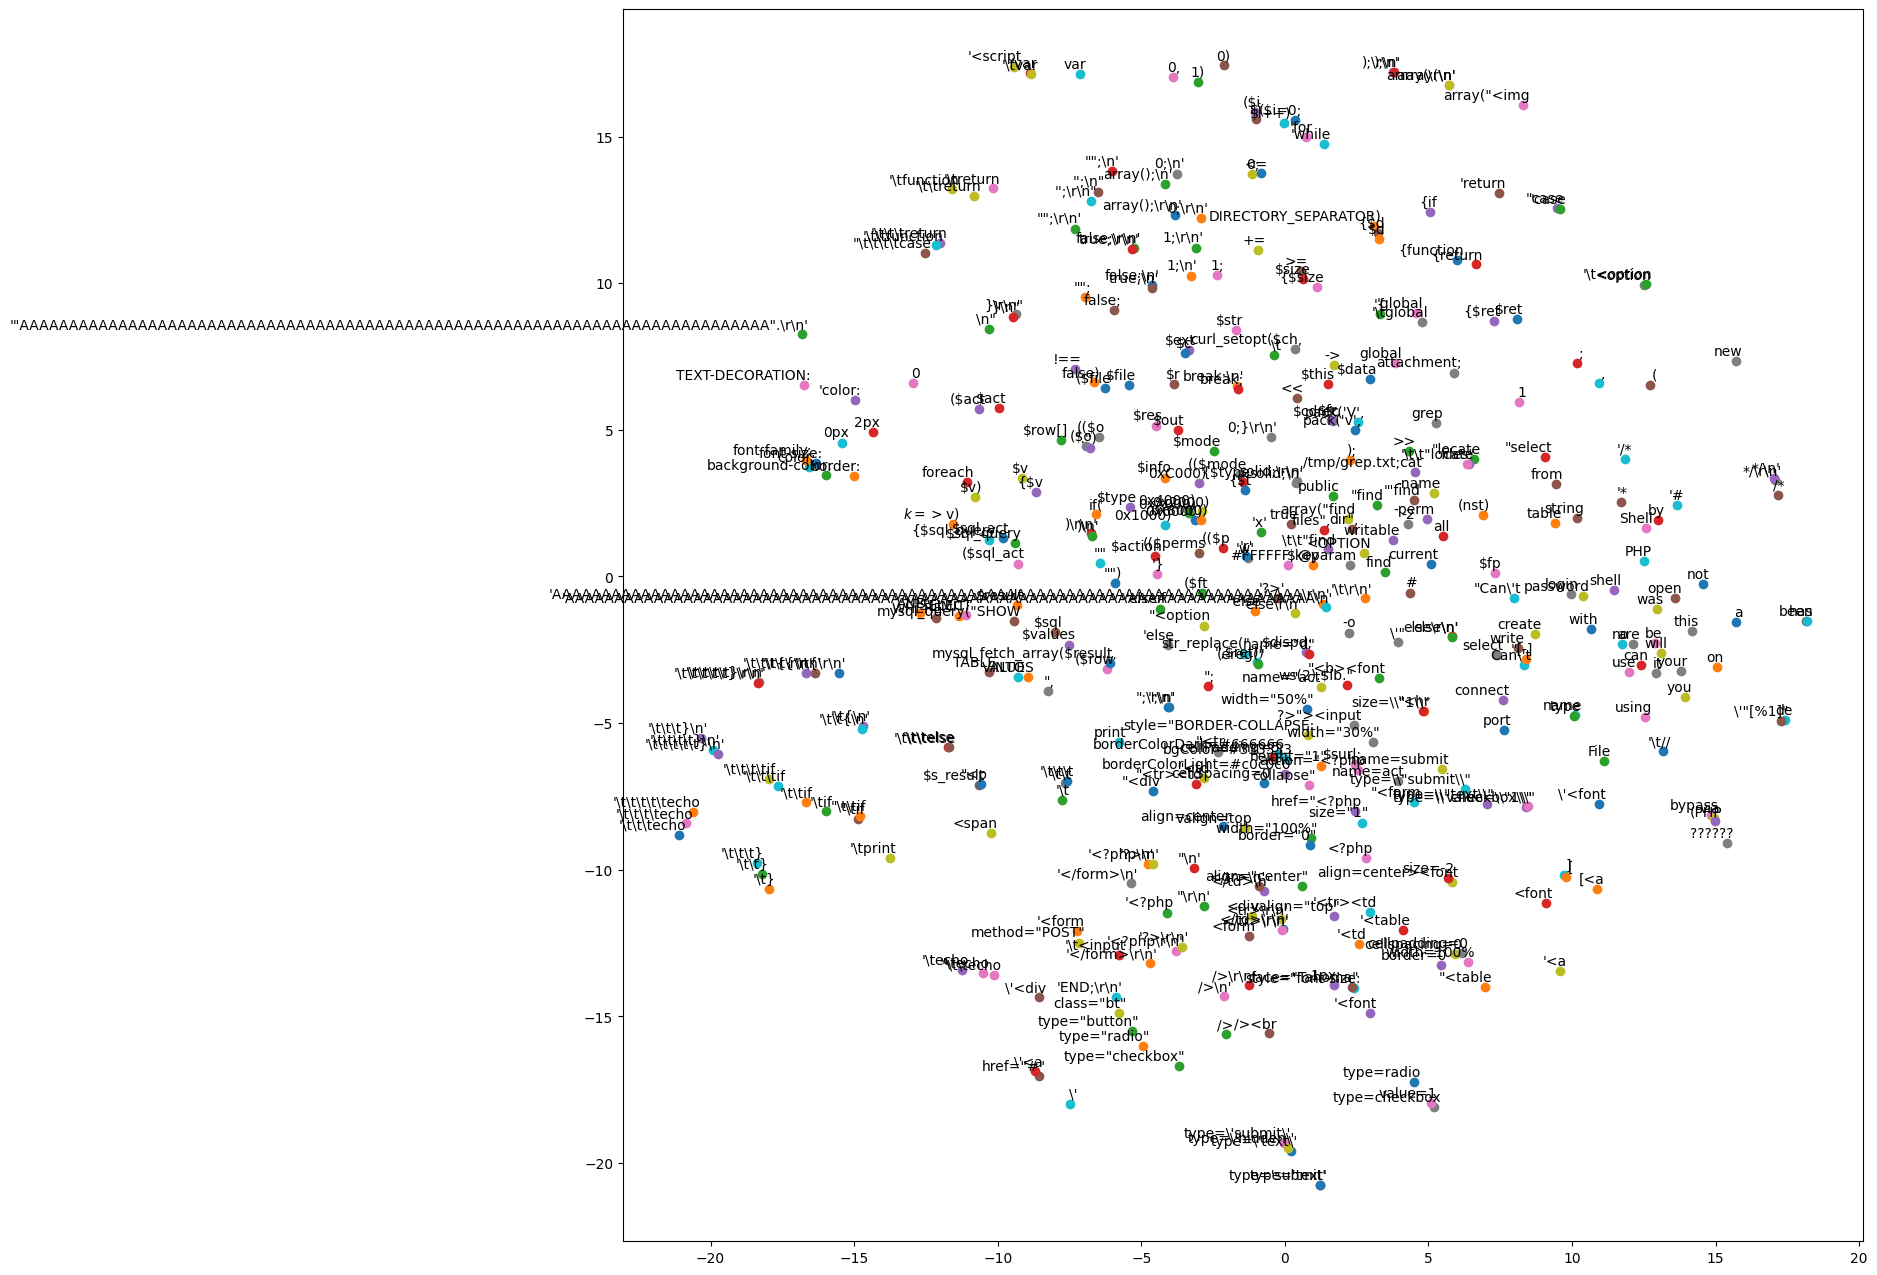

In [5]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

sensitiveFunctions = ['system','phpinfo','base64','gzip','mkdir','fopen','fclose','passthru']


def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.index_to_key[100:500]:
        tokens.append(model.wv.get_vector(word))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
tsne_plot(wordModel)